In [1]:
import pandas as pd , numpy as np

In [5]:
##  To Show all columns at a time
pd.set_option('display.max_columns', None)


## Read first appllicant csv file 
data1=pd.read_csv("d:/data/data/applicant.csv")

## Read first loan csv file 

data2=pd.read_csv("d:/data/data/loan.csv")

## First Datframe Shape
data1.shape

(1000, 15)

In [6]:
## Second Dataframe shape
data2.shape

(1000, 13)

In [7]:
## Concate two dataframe and made a new dataframe to check insights from datasets
data3=pd.concat([data1,data2],axis=1)
# New Dataframe shape
data3.shape

(1000, 28)

In [8]:
# Drop Duplicate and Orginal Apllicant Id  
data3.drop(['applicant_id'],axis=1,inplace=True)

In [9]:
data3.isna().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                                           0
Months_loan_taken_for                   

In [10]:
data3.drop(['Telephone','Other_EMI_plans',],axis=1,inplace=True)

In [11]:
data3.isna().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                                           0
Months_loan_taken_for                                         0
Purpose                                 

In [12]:
data3["Has_been_employed_for_at_least"].unique()

array(['7 years', '1 year', '4 years', nan, '0 year'], dtype=object)

In [13]:
data3["Has_been_employed_for_at_most"].unique()

array([nan, '4 years', '7 years', '0 year', '1 year'], dtype=object)

In [14]:
data3['Has_been_employed_for_at_least'].fillna('0 year',inplace=True)
data3["Has_been_employed_for_at_least"].unique()

array(['7 years', '1 year', '4 years', '0 year'], dtype=object)

In [15]:
data3['Has_been_employed_for_at_most'].fillna('0 year',inplace=True)
data3["Has_been_employed_for_at_most"].unique()

array(['0 year', '4 years', '7 years', '1 year'], dtype=object)

In [16]:
df_1= data3["Has_been_employed_for_at_least"].str.split(" ", n = 1, expand = True)
df_2 = data3["Has_been_employed_for_at_most"].str.split(" ", n = 1, expand = True)
data3["Has_been_employed_for_at_least"] = df_1[0].astype(int)
data3["Has_been_employed_for_at_most"] = df_2[0].astype(int)


In [17]:
data3.isna().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                                0
Has_been_employed_for_at_most                                 0
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                                           0
Months_loan_taken_for                                         0
Purpose                                 

In [18]:
data3["Savings_account_balance"].unique()

array([nan, 'Low', 'High', 'Very high', 'Medium'], dtype=object)

In [19]:
data3['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].unique()

array([nan, '0', '2 lac'], dtype=object)

In [20]:
data3['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].unique()

array(['0', '2 lac', nan], dtype=object)

In [21]:
data3[["Balance_in_existing_bank_account_(lower_limit_of_bucket)","Balance_in_existing_bank_account_(upper_limit_of_bucket)"]].tail(20)

,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
980,0,2 lac
981,NaN,NaN
982,2 lac,NaN
983,NaN,0
984,NaN,NaN
985,NaN,0
986,2 lac,NaN
987,NaN,NaN
988,NaN,0
989,0,2 lac


In [22]:
data3['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].fillna('0 lac',inplace=True)
data3['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].fillna('0 lac',inplace=True)


df_up= data3["Balance_in_existing_bank_account_(upper_limit_of_bucket)"].str.split(" ", n = 1, expand = True)
df_lo = data3["Balance_in_existing_bank_account_(lower_limit_of_bucket)"].str.split(" ", n = 1, expand = True)
data3["Balance_in_existing_bank_account_(upper_limit_of_bucket)"] = df_up[0].astype(int)
data3["Balance_in_existing_bank_account_(lower_limit_of_bucket)"] = df_lo[0].astype(int)

In [23]:
data3.isna().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                                0
Has_been_employed_for_at_most                                 0
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)      0
Balance_in_existing_bank_account_(upper_limit_of_bucket)      0
loan_application_id                                           0
Months_loan_taken_for                                         0
Purpose                                 

In [24]:
data4 = data3.copy()

In [25]:
data4['Savings_account_balance'].unique()

array([nan, 'Low', 'High', 'Very high', 'Medium'], dtype=object)

In [26]:
data4[['Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)']]

,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket)
0,NaN,0
1,Low,0
2,Low,0
3,Low,0
4,Low,0
...,...,...
995,Low,0
996,Low,0
997,Low,0
998,Low,0


In [27]:
data5 = data4[data4['Savings_account_balance'].isna()]

In [28]:
data5[['Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)']]

,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket)
0,NaN,0
5,NaN,0
16,NaN,0
17,NaN,0
24,NaN,0
...,...,...
968,NaN,0
977,NaN,0
990,NaN,0
992,NaN,0


In [29]:
data5['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts()

0    173
2     10
Name: Balance_in_existing_bank_account_(lower_limit_of_bucket), dtype: int64

In [30]:
data4['Savings_account_balance'].fillna('Low',inplace=True)

In [31]:
data4['Savings_account_balance'].unique()

array(['Low', 'High', 'Very high', 'Medium'], dtype=object)

In [32]:
data4.isna().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                                0
Has_been_employed_for_at_most                                 0
Foreign_worker                                                0
Savings_account_balance                                       0
Balance_in_existing_bank_account_(lower_limit_of_bucket)      0
Balance_in_existing_bank_account_(upper_limit_of_bucket)      0
loan_application_id                                           0
Months_loan_taken_for                                         0
Purpose                                 

In [33]:
data4['Purpose'].value_counts()

electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

In [34]:
data4['Purpose'].fillna('electronic equipment',inplace=True) # because of mode value is electric equipment

In [35]:
data4['Property'].value_counts()   # contains 154 none values

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

In [36]:
data4['Property'].fillna('car or other',inplace=True)

In [35]:
data4.isna().sum()

Primary_applicant_age_in_years                              0
Gender                                                      0
Marital_status                                              0
Number_of_dependents                                        0
Housing                                                     0
Years_at_current_residence                                  0
Employment_status                                           0
Has_been_employed_for_at_least                              0
Has_been_employed_for_at_most                               0
Foreign_worker                                              0
Savings_account_balance                                     0
Balance_in_existing_bank_account_(lower_limit_of_bucket)    0
Balance_in_existing_bank_account_(upper_limit_of_bucket)    0
loan_application_id                                         0
Months_loan_taken_for                                       0
Purpose                                                     0
Principa

<AxesSubplot:>

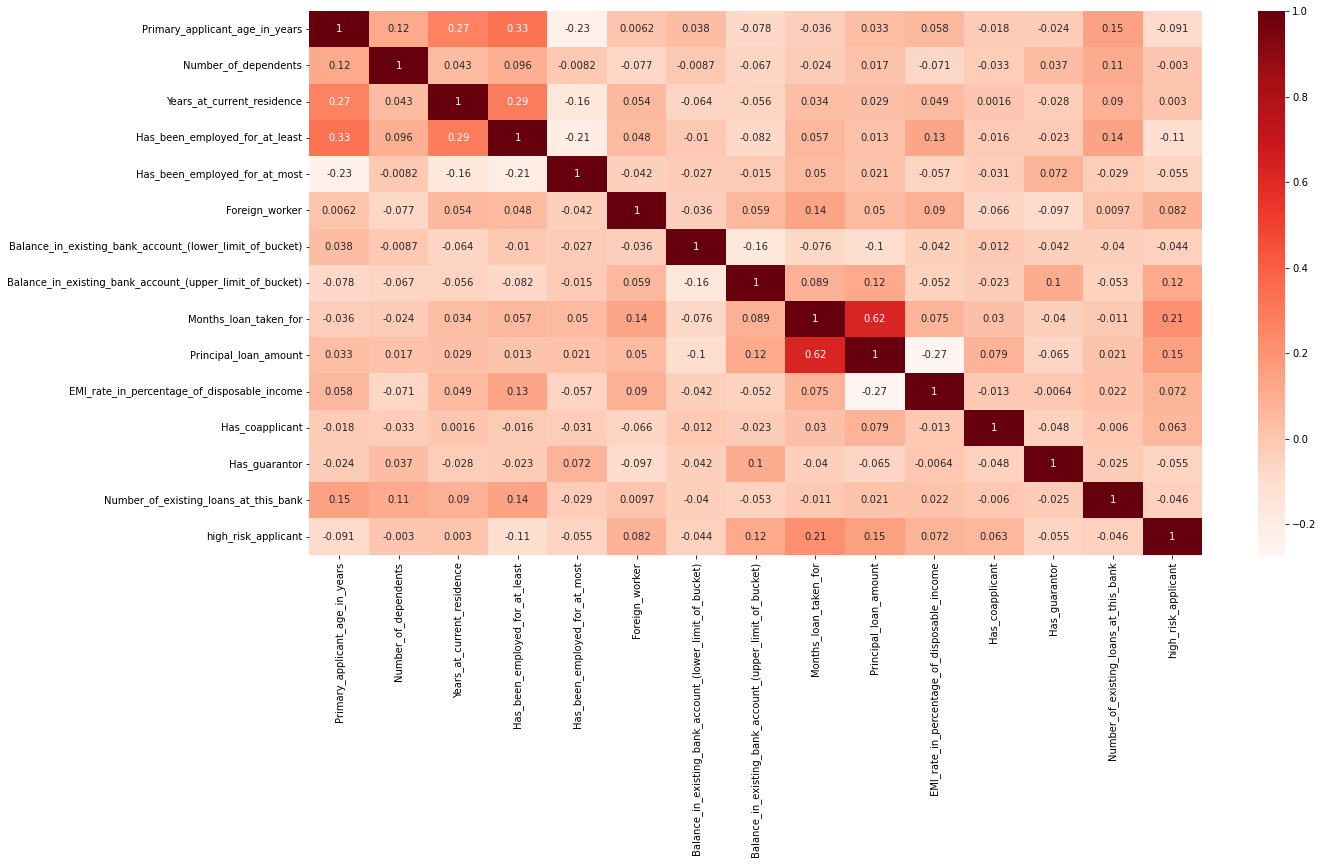

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt
# figsize=(20, 20)
corr = data4.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Reds", annot=True)

C:\Users\avive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


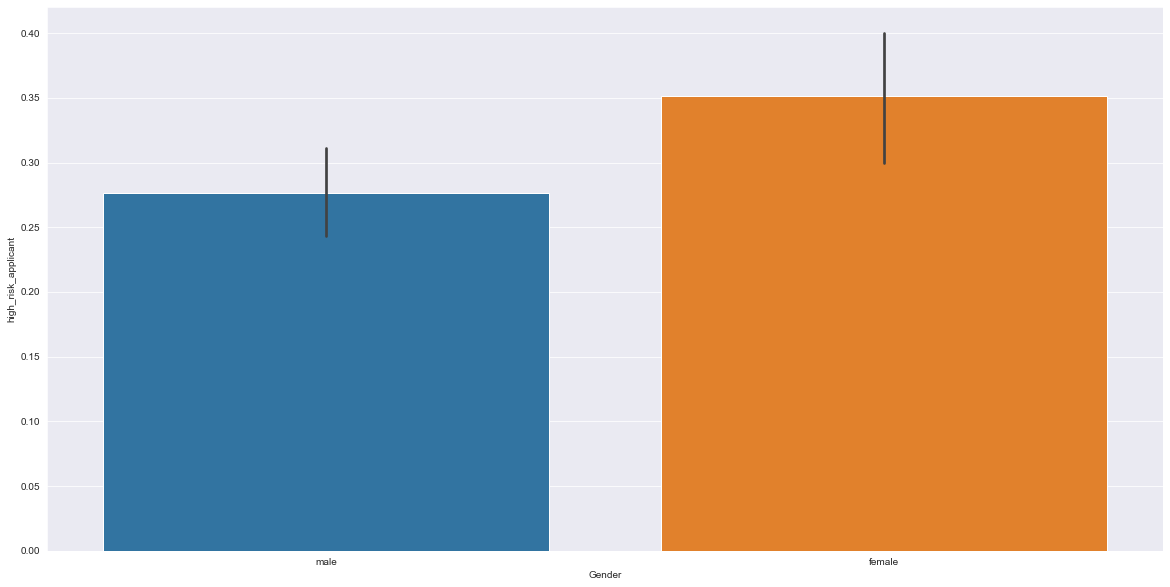

In [38]:
sns.set_style('darkgrid')

x = data4['Gender']
y = data4['high_risk_applicant']
plt.figure(figsize=(20,10))
sns.barplot(x, y)
plt.show()

C:\Users\avive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


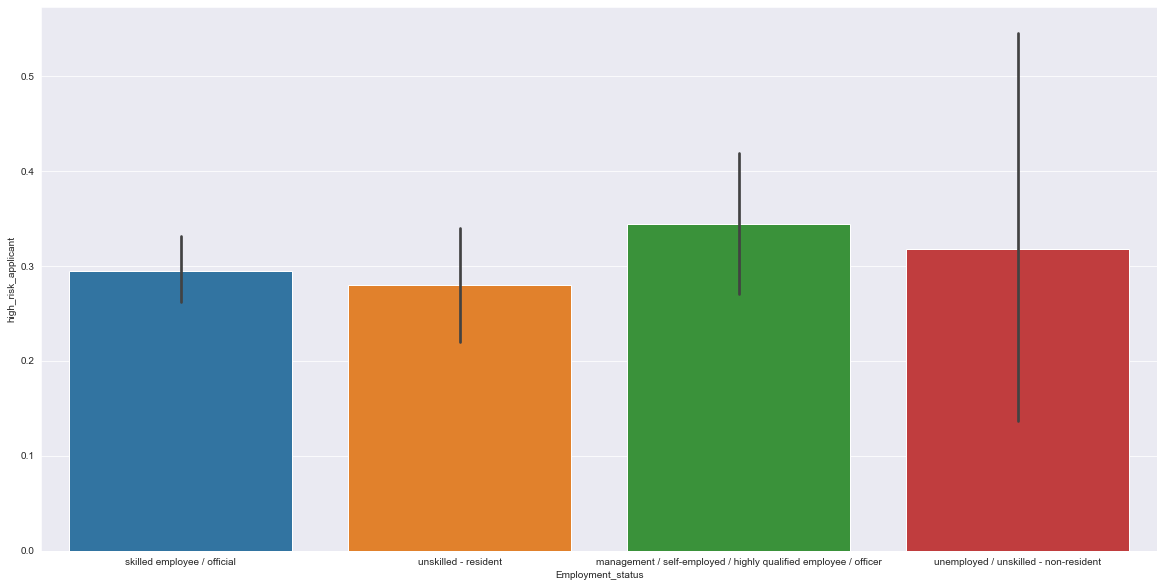

In [39]:
sns.set_style('darkgrid')

x = data4['Employment_status']
y = data4['high_risk_applicant']
plt.figure(figsize=(20,10))
sns.barplot(x, y)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


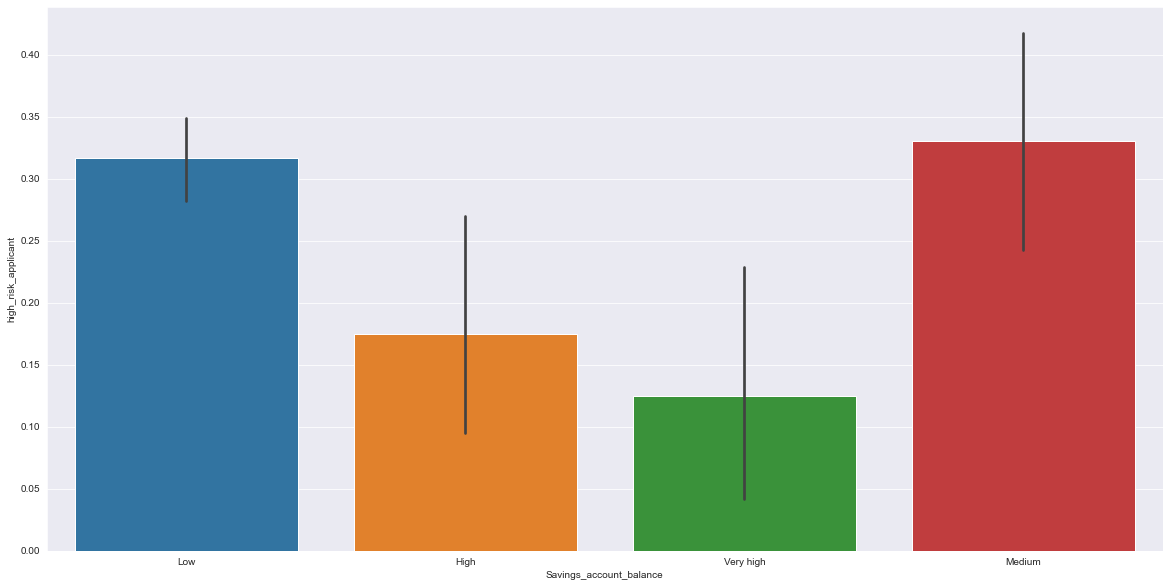

In [39]:
sns.set_style('darkgrid')

x = data4['Savings_account_balance']
y = data4['high_risk_applicant']
plt.figure(figsize=(20,10))
sns.barplot(x, y)
plt.show()

In [40]:
data4.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7,0,1,Low,0,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1,4,1,Low,0,2,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4,7,1,Low,0,0,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4,7,1,Low,0,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1,4,1,Low,0,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1


In [41]:
data4.to_csv('d:part2.csv')